In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score


from collections import OrderedDict
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


In [2]:
df = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')
Id = X_test['Id'];
X_test.drop(['Id'], axis=1, inplace=True)

In [3]:
df.shape, df.size

((200000, 18), 3600000)

In [4]:
X_test.head(5)

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
0,64,64,32,8,8,8,8,8,8,8,1,0,0,1
1,64,64,32,8,8,8,8,8,8,4,1,1,0,0
2,64,64,32,8,8,8,8,8,8,2,1,1,0,1
3,64,64,32,8,8,8,8,8,8,2,1,0,1,0
4,64,64,32,8,8,8,8,8,8,2,1,0,0,1


In [5]:
df.head(5)

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,128,128,16,16,16,16,16,2,1,1,0,0,0,0,287.87,288.66,289.45,288.24
1,128,128,16,16,16,16,16,2,1,1,0,0,0,1,241.13,247.84,248.27,247.49
2,128,128,16,16,16,16,16,2,1,1,0,0,1,1,148.12,149.99,149.90,150.14
3,128,128,16,16,16,16,16,2,1,1,0,1,0,0,301.40,302.43,302.70,301.94
4,128,128,16,16,16,16,16,2,1,1,0,1,1,0,244.74,251.80,252.15,251.04


In [6]:
df.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,80.449760,80.491200,25.504240,13.939880,13.935520,17.348480,17.379280,4.999550,2.452715,2.45097,0.499680,0.499865,0.49906,0.499925,217.998110,217.928765,217.883455,217.880732
std,42.481567,42.457207,7.857326,7.878135,7.876161,9.379925,9.384725,3.000007,1.957956,1.95554,0.500001,0.500001,0.50000,0.500001,369.398349,369.070383,369.058931,369.081649
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.00000,0.000000,13.290000,13.250000,13.360000,13.370000
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.00000,0.000000,40.690000,40.750000,40.690000,40.680000
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,2.000000,2.000000,2.00000,0.000000,0.000000,0.00000,0.000000,69.900000,70.000000,69.870000,69.900000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.00000,1.000000,1.000000,1.00000,1.000000,228.910000,228.580000,228.602500,228.570000
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.00000,1.000000,1.000000,1.00000,1.000000,3333.920000,3375.420000,3397.080000,3360.520000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
MWG          200000 non-null int64
NWG          200000 non-null int64
KWG          200000 non-null int64
MDIMC        200000 non-null int64
NDIMC        200000 non-null int64
MDIMA        200000 non-null int64
NDIMB        200000 non-null int64
KWI          200000 non-null int64
VWM          200000 non-null int64
VWN          200000 non-null int64
STRM         200000 non-null int64
STRN         200000 non-null int64
SA           200000 non-null int64
SB           200000 non-null int64
Run1 (ms)    200000 non-null float64
Run2 (ms)    200000 non-null float64
Run3 (ms)    200000 non-null float64
Run4 (ms)    200000 non-null float64
dtypes: float64(4), int64(14)
memory usage: 27.5 MB


In [8]:
categorical_features = df.columns

In [9]:
#missing data in Training set
pd.set_option('precision', 6)
null_values_per_col =  df.isnull().sum().sort_values(ascending = False)
percent = ( df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([null_values_per_col, percent.astype(float)], axis = 1, keys =["Total", "Percent"])
print(missing_data.head(20)) 

           Total  Percent
Run4 (ms)      0      0.0
Run3 (ms)      0      0.0
NWG            0      0.0
KWG            0      0.0
MDIMC          0      0.0
NDIMC          0      0.0
MDIMA          0      0.0
NDIMB          0      0.0
KWI            0      0.0
VWM            0      0.0
VWN            0      0.0
STRM           0      0.0
STRN           0      0.0
SA             0      0.0
SB             0      0.0
Run1 (ms)      0      0.0
Run2 (ms)      0      0.0
MWG            0      0.0


In [10]:
X = df.iloc[:,:-4]
y = df.iloc[:,-4:]

In [11]:
X.shape, y.shape

((200000, 14), (200000, 4))

In [12]:
X.head(5)

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
0,128,128,16,16,16,16,16,2,1,1,0,0,0,0
1,128,128,16,16,16,16,16,2,1,1,0,0,0,1
2,128,128,16,16,16,16,16,2,1,1,0,0,1,1
3,128,128,16,16,16,16,16,2,1,1,0,1,0,0
4,128,128,16,16,16,16,16,2,1,1,0,1,1,0


In [13]:
y.head(5)
col = X.columns

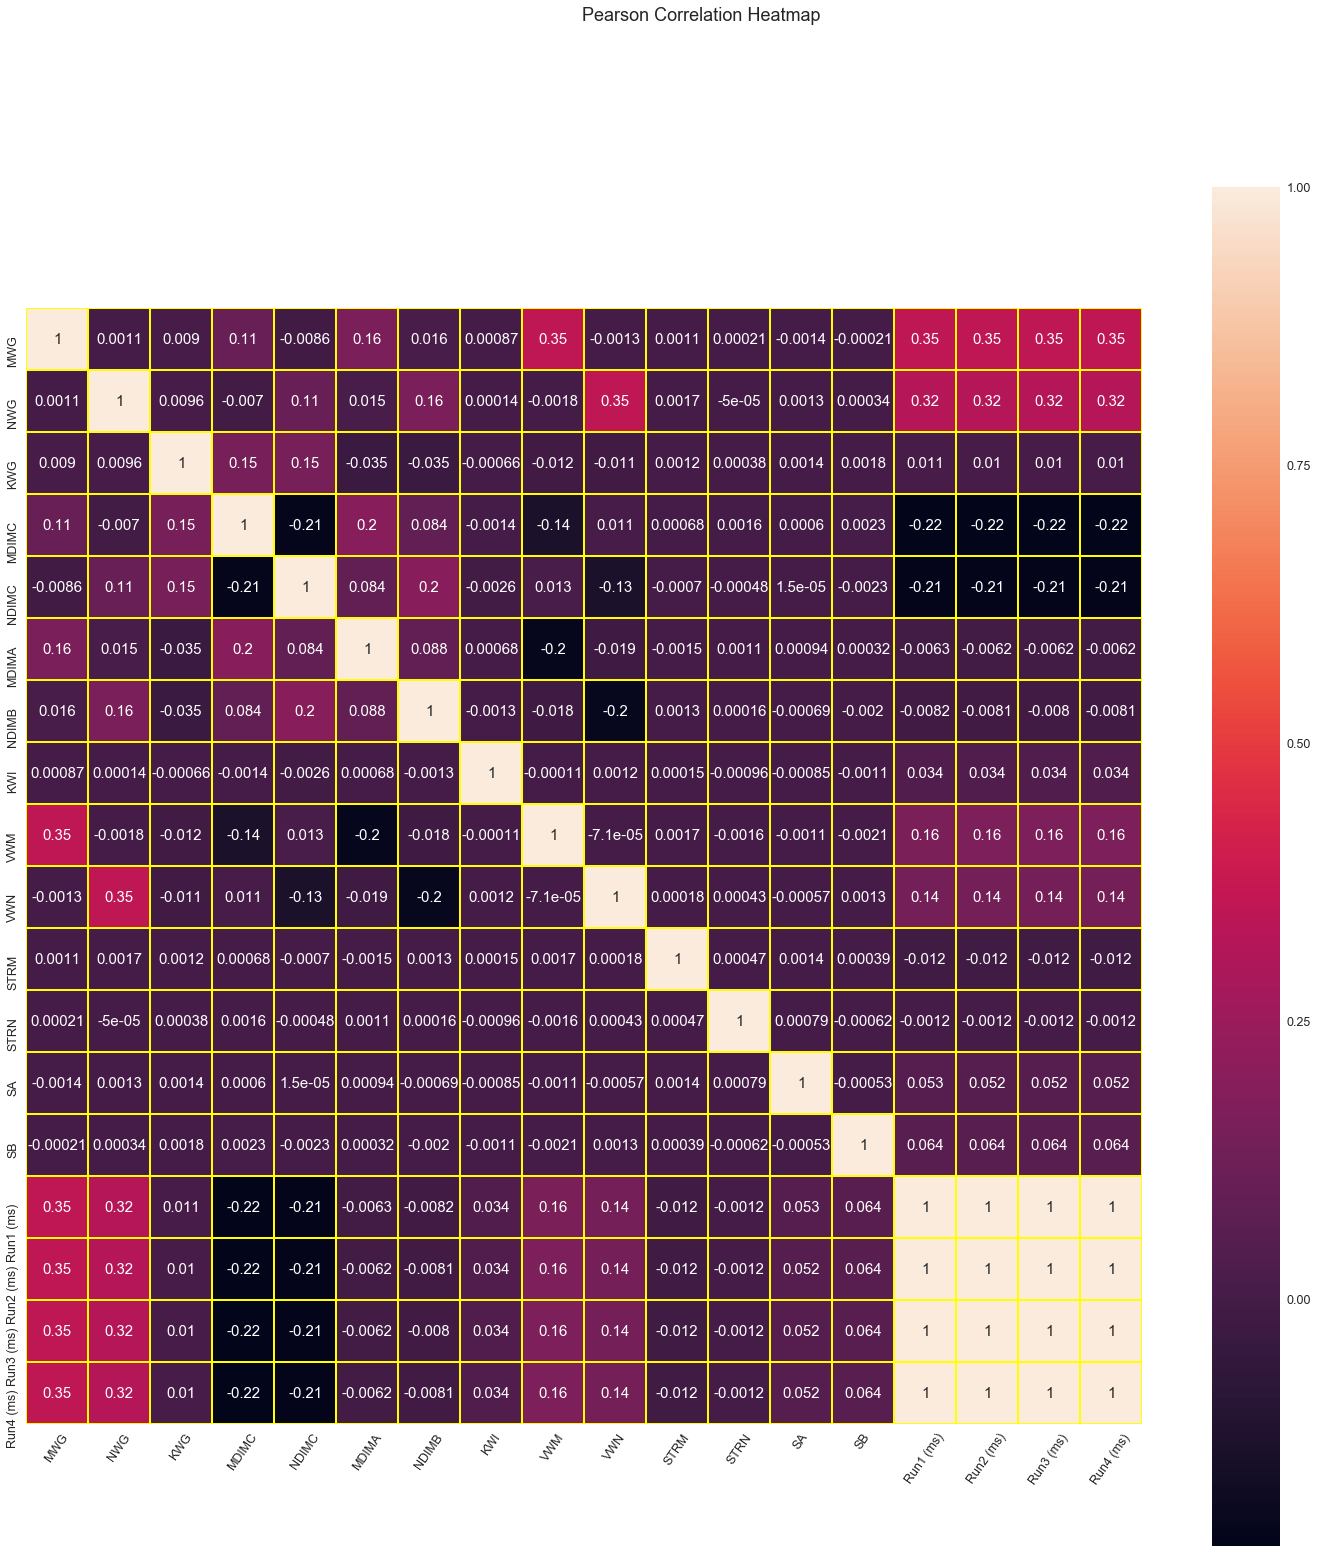

In [14]:
#Correlation matrix
plt.figure(figsize = (25,25))
sns.set(font_scale=1.25)
pd.set_option('precision', 2)
corrmat = df.corr()
sns.heatmap(corrmat, annot=True,  linewidths=1, linecolor='yellow',square = True)
plt.suptitle("Pearson Correlation Heatmap")
plt.xticks(rotation = 55)
plt.show()

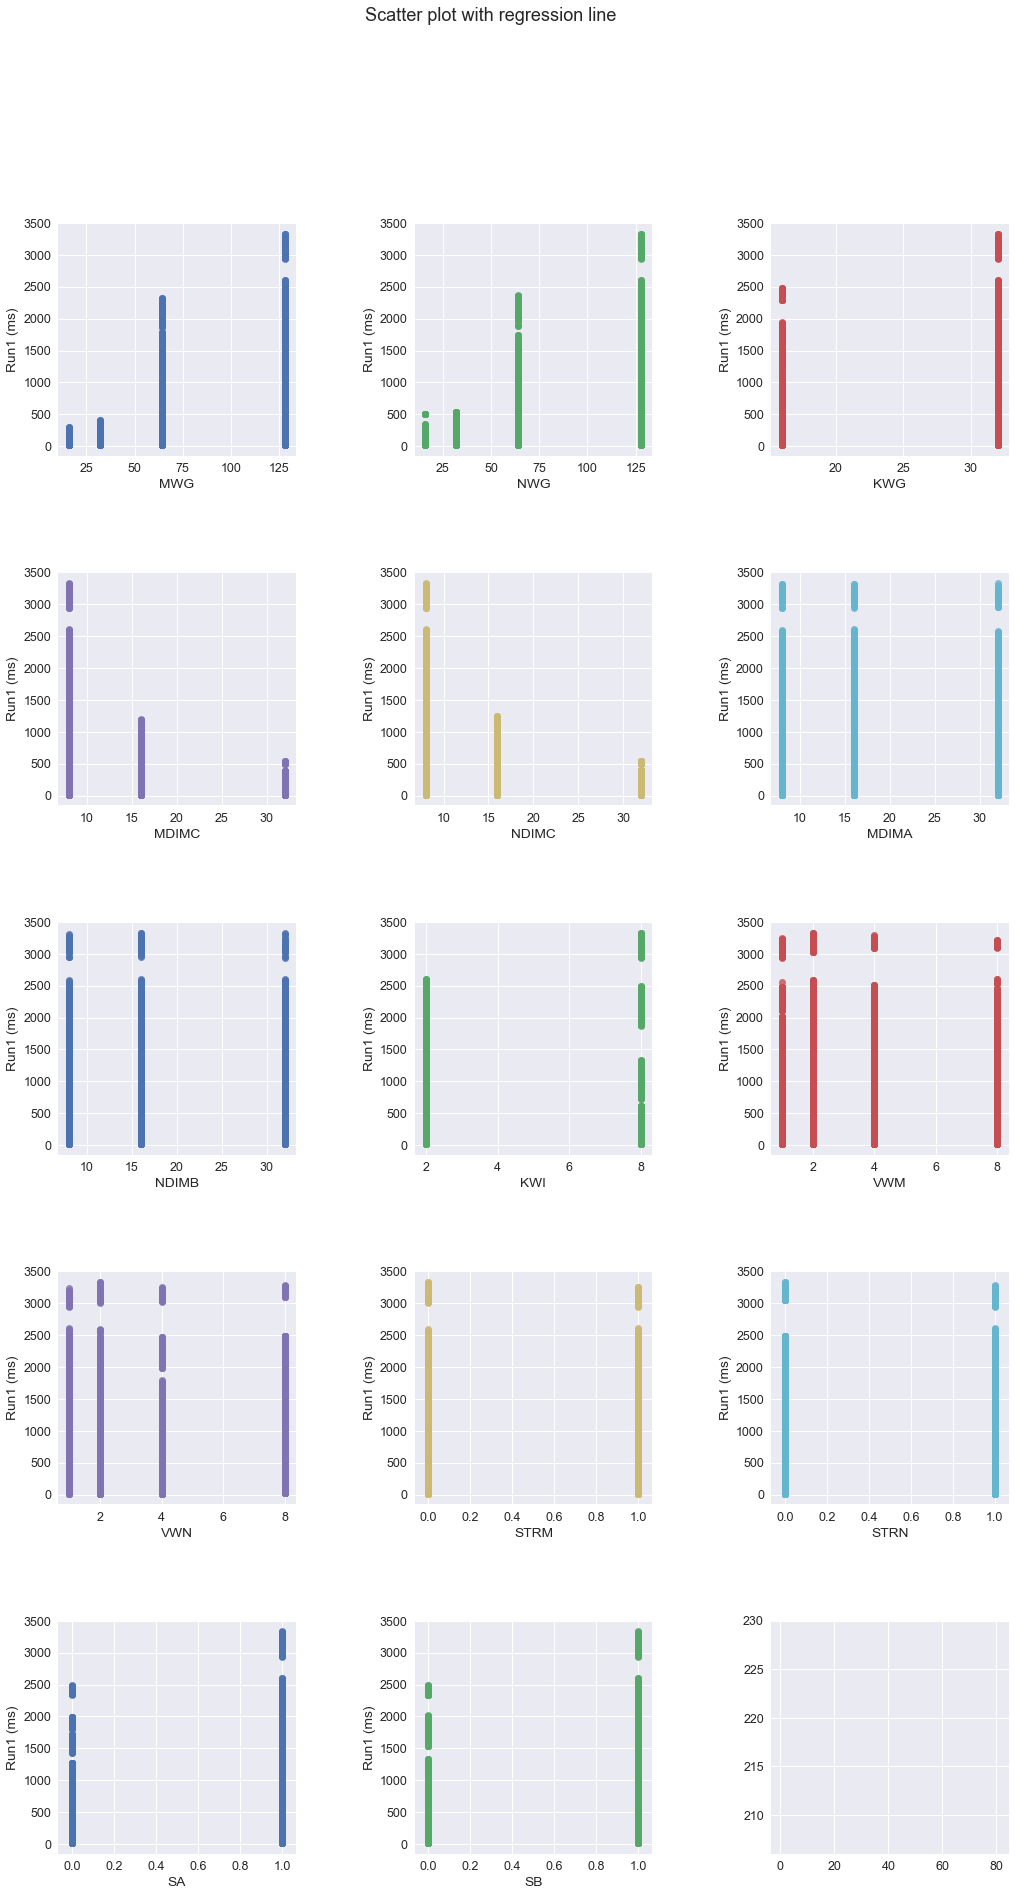

In [15]:

#Regression plot with individual numeric_feature
fig, axs = plt.subplots(5,3, figsize=(16, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5, right=0.95)

axs = axs.ravel()

for ind, col in enumerate(df.drop([ "Run1 (ms)","Run2 (ms)", "Run3 (ms)", "Run4 (ms)"], axis = 1).columns):
        sns.regplot(df[col],df['Run1 (ms)'], fit_reg = False, ax = axs[ind])
plt.suptitle('Scatter plot with regression line')
plt.show()


## Feature Scaling

In [16]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X_test = sc_X.transform(X_test)


In [17]:
#Splitting trainset into train and validation set 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=9)


## Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_val)


print("Linear Regression :")
print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
print("R2_score :\t\t", r2_score(y_val, y_pred))

## Decision Tree Regressor

deci_reg = DecisionTreeRegressor()
deci_reg.fit(X_train, y_train)
y_pred = deci_reg.predict(X_val)

print("\n\nDecision Tree Regressor :")
print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
print("R2_score :\t\t", r2_score(y_val, y_pred))

## Random Forest Regressor

rf_reg = RandomForestRegressor(n_estimators=200,max_depth=200,n_jobs=-1,random_state=20)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_val)

print("\n\nRandom Forest Regressor :")
print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
print("R2_score :\t\t", r2_score(y_val, y_pred))


Linear Regression :
Root Mean Squared Error : 283.1524243326049
R2_score :		 0.4088475888131747


Decision Tree Regressor :
Root Mean Squared Error : 5.981970052792193
R2_score :		 0.9997361577608455


Random Forest Regressor :
Root Mean Squared Error : 5.015119643076285
R2_score :		 0.9998145542379969


In [18]:
#Submission
# rf_reg = RandomForestRegressor(n_estimators=700,max_depth=500,n_jobs=-1,random_state=20)
# rf_reg.fit(X, y)
# pred = rf_reg.predict(X_test)
# pred = pd.DataFrame(pred, columns=['Run1 (ms)', 'Run2 (ms)','Run3 (ms)','Run4 (ms)']);
# ans = OrderedDict([('Id', Id), ('Run1 (ms)',pred.iloc[:,0]),('Run2 (ms)',pred.iloc[:,1]),('Run3 (ms)',pred.iloc[:,2]),('Run4 (ms)',pred.iloc[:,3])])
# submission = pd.DataFrame(ans)
# submission.to_csv(r'C:\Users\MyPC\Documents\AAVISHKAR\Q3\submission123.csv',index=False)


# Feature Selection


In [19]:
print("X shape :",X.shape, "\ny shape", y.shape)

X shape : (200000, 14) 
y shape (200000, 4)


In [20]:
import statsmodels.formula.api as sm
# adding bias to the data set

X_test = pd.DataFrame(X_test)
X = pd.DataFrame(X)
bias = pd.DataFrame(np.ones((200000,1)).astype(int))

X_opt = pd.concat([bias, X], axis=1)
y_opt = y

In [21]:
X_opt = np.array(X_opt)
y_opt = np.array(y_opt)

In [22]:
bias = pd.DataFrame(np.ones((41601,1)).astype(int))
X_test_opt =  pd.concat([bias, X_test], axis=1)
X_test_opt = np.array(X_test_opt)

In [23]:
regressor_OLS = sm.OLS(endog=y_opt[:,0], exog=X_opt).fit()
#significance level = 0.05
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     9866.
Date:                Wed, 26 Sep 2018   Prob (F-statistic):               0.00
Time:                        00:59:19   Log-Likelihood:            -1.4136e+06
No. Observations:              200000   AIC:                         2.827e+06
Df Residuals:                  199985   BIC:                         2.827e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        217.9981      0.635    343.153      0.000     216.753     219.243
x1           141.5065      0.707    200.024      0.000     140.120     142.893
x2           130.8888      0.708    184.954      0.000     129.502     132.276
x3            40.7612      0.659     61.840      0.000      39.469      42.053
x4          -132.2481      0.694   -190.630      0.000    -133.608    -130.888
x5          -129.2270      0.694   -186.272      0.000    -130.587    -127.867
x6            10.0047      0.686     14.585      0.000       8.660      11.349
x7             9.8759      0.686     14.400      0.000       8.532      11.220
x8            11.8988      0.635     18.730      0.000      10.654      13.144
x9            -2.5624      0.715     -3.584      0.000      -3.964      -1.161
x10           -6.0141      0.715     -8.413      0.000      -7.415      -4.613
x11           -4.9269      0.635     -7.755      0.000      -6.172      -3.682
x12           -0.3440      0.635     -0.541      0.588      -1.589       0.901
x13           19.4645      0.635     30.639      0.000      18.219      20.710
x14           23.6746      0.635     37.266      0.000      22.429      24.920
==============================================================================
Omnibus:                   151865.851   Durbin-Watson:                   0.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3440457.302
Skew:                           3.516   Prob(JB):                         0.00
Kurtosis:                      22.064   Cond. No.                         1.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
regressor_OLS = sm.OLS(endog=y_opt[:,1], exog=X_opt).fit()
#significance level = 0.05
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     9855.
Date:                Wed, 26 Sep 2018   Prob (F-statistic):               0.00
Time:                        00:59:19   Log-Likelihood:            -1.4135e+06
No. Observations:              200000   AIC:                         2.827e+06
Df Residuals:                  199985   BIC:                         2.827e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        217.9288      0.635    343.267      0.000     216.684     219.173
x1           141.5166      0.707    200.168      0.000     140.131     142.902
x2           130.7683      0.707    184.903      0.000     129.382     132.154
x3            40.5328      0.659     61.533      0.000      39.242      41.824
x4          -131.9524      0.693   -190.328      0.000    -133.311    -130.594
x5          -128.9245      0.693   -185.956      0.000    -130.283    -127.566
x6             9.9353      0.685     14.494      0.000       8.592      11.279
x7             9.8194      0.685     14.327      0.000       8.476      11.163
x8            12.0700      0.635     19.012      0.000      10.826      13.314
x9            -2.5719      0.714     -3.600      0.000      -3.972      -1.172
x10           -6.0279      0.714     -8.437      0.000      -7.428      -4.628
x11           -4.9357      0.635     -7.774      0.000      -6.180      -3.691
x12           -0.3353      0.635     -0.528      0.597      -1.580       0.909
x13           19.2026      0.635     30.246      0.000      17.958      20.447
x14           23.5582      0.635     37.107      0.000      22.314      24.803
==============================================================================
Omnibus:                   152245.538   Durbin-Watson:                   0.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3483524.009
Skew:                           3.525   Prob(JB):                         0.00
Kurtosis:                      22.192   Cond. No.                         1.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
regressor_OLS = sm.OLS(endog=y_opt[:,2], exog=X_opt).fit()
#significance level = 0.05
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     9858.
Date:                Wed, 26 Sep 2018   Prob (F-statistic):               0.00
Time:                        00:59:19   Log-Likelihood:            -1.4135e+06
No. Observations:              200000   AIC:                         2.827e+06
Df Residuals:                  199985   BIC:                         2.827e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        217.8835      0.635    343.233      0.000     216.639     219.128
x1           141.5206      0.707    200.196      0.000     140.135     142.906
x2           130.8080      0.707    184.980      0.000     129.422     132.194
x3            40.5351      0.659     61.544      0.000      39.244      41.826
x4          -131.9656      0.693   -190.368      0.000    -133.324    -130.607
x5          -128.8984      0.693   -185.940      0.000    -130.257    -127.540
x6             9.9517      0.685     14.519      0.000       8.608      11.295
x7             9.8379      0.685     14.355      0.000       8.495      11.181
x8            12.0833      0.635     19.035      0.000      10.839      13.328
x9            -2.5639      0.714     -3.589      0.000      -3.964      -1.164
x10           -6.0236      0.714     -8.432      0.000      -7.424      -4.623
x11           -4.9270      0.635     -7.761      0.000      -6.171      -3.683
x12           -0.3404      0.635     -0.536      0.592      -1.585       0.904
x13           19.1841      0.635     30.221      0.000      17.940      20.428
x14           23.5620      0.635     37.117      0.000      22.318      24.806
==============================================================================
Omnibus:                   152289.126   Durbin-Watson:                   0.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3488358.832
Skew:                           3.526   Prob(JB):                         0.00
Kurtosis:                      22.206   Cond. No.                         1.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
regressor_OLS = sm.OLS(endog=y_opt[:,3], exog=X_opt).fit()
#significance level = 0.05
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     9856.
Date:                Wed, 26 Sep 2018   Prob (F-statistic):               0.00
Time:                        00:59:19   Log-Likelihood:            -1.4135e+06
No. Observations:              200000   AIC:                         2.827e+06
Df Residuals:                  199985   BIC:                         2.827e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        217.8807      0.635    343.189      0.000     216.636     219.125
x1           141.5330      0.707    200.190      0.000     140.147     142.919
x2           130.7832      0.707    184.924      0.000     129.397     132.169
x3            40.5192      0.659     61.512      0.000      39.228      41.810
x4          -131.9596      0.693   -190.337      0.000    -133.318    -130.601
x5          -128.9094      0.693   -185.934      0.000    -130.268    -127.551
x6             9.9435      0.685     14.506      0.000       8.600      11.287
x7             9.8274      0.685     14.338      0.000       8.484      11.171
x8            12.0742      0.635     19.018      0.000      10.830      13.319
x9            -2.5702      0.714     -3.598      0.000      -3.971      -1.170
x10           -6.0147      0.714     -8.419      0.000      -7.415      -4.614
x11           -4.9294      0.635     -7.764      0.000      -6.174      -3.685
x12           -0.3344      0.635     -0.527      0.598      -1.579       0.910
x13           19.1914      0.635     30.229      0.000      17.947      20.436
x14           23.5567      0.635     37.104      0.000      22.312      24.801
==============================================================================
Omnibus:                   152282.875   Durbin-Watson:                   0.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3487697.713
Skew:                           3.526   Prob(JB):                         0.00
Kurtosis:                      22.204   Cond. No.                         1.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
X_opt = np.delete(X_opt, 12,1)

In [24]:
X_test_opt = np.delete(X_test_opt, 12,1)

In [29]:
regressor_OLS = sm.OLS(endog=y_opt[:,0], exog=X_opt).fit()
#significance level = 0.05
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                 1.062e+04
Date:                Wed, 26 Sep 2018   Prob (F-statistic):               0.00
Time:                        00:59:20   Log-Likelihood:            -1.4136e+06
No. Observations:              200000   AIC:                         2.827e+06
Df Residuals:                  199986   BIC:                         2.827e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        217.9981      0.635    343.153      0.000     216.753     219.243
x1           141.5063      0.707    200.024      0.000     140.120     142.893
x2           130.8889      0.708    184.954      0.000     129.502     132.276
x3            40.7611      0.659     61.840      0.000      39.469      42.053
x4          -132.2485      0.694   -190.631      0.000    -133.608    -130.889
x5          -129.2270      0.694   -186.272      0.000    -130.587    -127.867
x6            10.0045      0.686     14.585      0.000       8.660      11.349
x7             9.8758      0.686     14.400      0.000       8.532      11.220
x8            11.8991      0.635     18.730      0.000      10.654      13.144
x9            -2.5619      0.715     -3.584      0.000      -3.963      -1.161
x10           -6.0143      0.715     -8.413      0.000      -7.415      -4.613
x11           -4.9271      0.635     -7.756      0.000      -6.172      -3.682
x12           19.4642      0.635     30.639      0.000      18.219      20.709
x13           23.6748      0.635     37.266      0.000      22.430      24.920
==============================================================================
Omnibus:                   151865.042   Durbin-Watson:                   0.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3440437.770
Skew:                           3.516   Prob(JB):                         0.00
Kurtosis:                      22.063   Cond. No.                         1.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
regressor_OLS = sm.OLS(endog=y_opt[:,1], exog=X_opt).fit()
#significance level = 0.05
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                 1.061e+04
Date:                Wed, 26 Sep 2018   Prob (F-statistic):               0.00
Time:                        00:59:20   Log-Likelihood:            -1.4135e+06
No. Observations:              200000   AIC:                         2.827e+06
Df Residuals:                  199986   BIC:                         2.827e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        217.9288      0.635    343.267      0.000     216.684     219.173
x1           141.5164      0.707    200.168      0.000     140.131     142.902
x2           130.7684      0.707    184.904      0.000     129.382     132.155
x3            40.5327      0.659     61.533      0.000      39.242      41.824
x4          -131.9528      0.693   -190.329      0.000    -133.312    -130.594
x5          -128.9244      0.693   -185.957      0.000    -130.283    -127.566
x6             9.9352      0.685     14.494      0.000       8.592      11.279
x7             9.8193      0.685     14.327      0.000       8.476      11.163
x8            12.0703      0.635     19.012      0.000      10.826      13.315
x9            -2.5714      0.714     -3.599      0.000      -3.972      -1.171
x10           -6.0281      0.714     -8.438      0.000      -7.428      -4.628
x11           -4.9358      0.635     -7.775      0.000      -6.180      -3.691
x12           19.2023      0.635     30.246      0.000      17.958      20.447
x13           23.5584      0.635     37.107      0.000      22.314      24.803
==============================================================================
Omnibus:                   152244.740   Durbin-Watson:                   0.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3483503.957
Skew:                           3.525   Prob(JB):                         0.00
Kurtosis:                      22.192   Cond. No.                         1.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
regressor_OLS = sm.OLS(endog=y_opt[:,2], exog=X_opt).fit()
#significance level = 0.05
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                 1.062e+04
Date:                Wed, 26 Sep 2018   Prob (F-statistic):               0.00
Time:                        00:59:20   Log-Likelihood:            -1.4135e+06
No. Observations:              200000   AIC:                         2.827e+06
Df Residuals:                  199986   BIC:                         2.827e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        217.8835      0.635    343.234      0.000     216.639     219.128
x1           141.5204      0.707    200.196      0.000     140.135     142.906
x2           130.8081      0.707    184.981      0.000     129.422     132.194
x3            40.5350      0.659     61.544      0.000      39.244      41.826
x4          -131.9660      0.693   -190.369      0.000    -133.325    -130.607
x5          -128.8984      0.693   -185.940      0.000    -130.257    -127.540
x6             9.9515      0.685     14.519      0.000       8.608      11.295
x7             9.8378      0.685     14.355      0.000       8.495      11.181
x8            12.0837      0.635     19.035      0.000      10.839      13.328
x9            -2.5633      0.714     -3.588      0.000      -3.963      -1.163
x10           -6.0238      0.714     -8.432      0.000      -7.424      -4.624
x11           -4.9271      0.635     -7.762      0.000      -6.171      -3.683
x12           19.1838      0.635     30.220      0.000      17.940      20.428
x13           23.5622      0.635     37.117      0.000      22.318      24.806
==============================================================================
Omnibus:                   152288.309   Durbin-Watson:                   0.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3488337.707
Skew:                           3.526   Prob(JB):                         0.00
Kurtosis:                      22.206   Cond. No.                         1.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
regressor_OLS = sm.OLS(endog=y_opt[:,3], exog=X_opt).fit()
#significance level = 0.05
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                 1.061e+04
Date:                Wed, 26 Sep 2018   Prob (F-statistic):               0.00
Time:                        00:59:21   Log-Likelihood:            -1.4135e+06
No. Observations:              200000   AIC:                         2.827e+06
Df Residuals:                  199986   BIC:                         2.827e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        217.8807      0.635    343.190      0.000     216.636     219.125
x1           141.5328      0.707    200.190      0.000     140.147     142.918
x2           130.7833      0.707    184.924      0.000     129.397     132.169
x3            40.5191      0.659     61.512      0.000      39.228      41.810
x4          -131.9600      0.693   -190.338      0.000    -133.319    -130.601
x5          -128.9094      0.693   -185.934      0.000    -130.268    -127.551
x6             9.9434      0.685     14.505      0.000       8.600      11.287
x7             9.8273      0.685     14.338      0.000       8.484      11.171
x8            12.0745      0.635     19.019      0.000      10.830      13.319
x9            -2.5697      0.714     -3.597      0.000      -3.970      -1.169
x10           -6.0149      0.714     -8.419      0.000      -7.415      -4.615
x11           -4.9296      0.635     -7.765      0.000      -6.174      -3.685
x12           19.1911      0.635     30.228      0.000      17.947      20.435
x13           23.5569      0.635     37.105      0.000      22.313      24.801
==============================================================================
Omnibus:                   152282.079   Durbin-Watson:                   0.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3487677.847
Skew:                           3.526   Prob(JB):                         0.00
Kurtosis:                      22.204   Cond. No.                         1.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Modeling

In [25]:
#Splitting trainset into train and validation set 
X_train, X_val, y_train, y_val = train_test_split(X_opt, y_opt, test_size=0.4, random_state=9)

## Random Forest Regressor

rf_reg = RandomForestRegressor(n_estimators=200,max_depth=200,n_jobs=-1,random_state=20)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_val)

print("\n\nRandom Forest Regressor :")
print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
print("R2_score :\t\t", r2_score(y_val, y_pred))




Random Forest Regressor :
Root Mean Squared Error : 22.084152847080187
R2_score :		 0.9963628720638367


# cross Validation Score

In [26]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator=rf_reg, X=X_opt, y=y_opt, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')

In [27]:
score

array([-2.18325344e+05, -1.22217353e+05, -7.66261669e+03, -1.06584176e+05,
       -4.08522972e+04, -4.97437014e+03, -1.91234147e+02, -1.05833250e+05,
       -3.96345372e+04, -7.77972234e+03])

In [136]:

rf_reg = RandomForestRegressor(n_estimators=200,max_depth=200,n_jobs=-1,random_state=20)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_val)

print("\n\nRandom Forest Regressor :")
print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
print("R2_score :\t\t", r2_score(y_val, y_pred))




Random Forest Regressor :
Root Mean Squared Error : 22.084152847080187
R2_score :		 0.9963628720638367


In [28]:

#Submission
# rf_reg = RandomForestRegressor(n_estimators=200,max_depth=200,n_jobs=-1,random_state=20)
# rf_reg.fit(X, y)
# pred = rf_reg.predict(X_test)
# pred = pd.DataFrame(pred, columns=['Run1 (ms)', 'Run2 (ms)','Run3 (ms)','Run4 (ms)']);
# ans = OrderedDict([('Id', Id), ('Run1 (ms)',pred.iloc[:,0]),('Run2 (ms)',pred.iloc[:,1]),('Run3 (ms)',pred.iloc[:,2]),('Run4 (ms)',pred.iloc[:,3])])
# submission = pd.DataFrame(ans)
# submission.to_csv(r'C:\Users\MyPC\Documents\AAVISHKAR\Q3\submission123.csv',index=False)


# Grid Search

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [30]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train )

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 31.8min


In [ ]:
rf_random.best_params_